# ASSIGNMENT 1

**NOME:** Christian

**COGNOME:** Uccheddu

**MATRICOLA:** 800428

Ci interessa solo la provincia di milano

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
print("Pandas version:",pd.__version__)
print("Geoandas version:",gpd.__version__)
print("Matplotlib version:",mpl.__version__)

Pandas version: 1.2.3
Geoandas version: 0.8.1
Matplotlib version: 3.3.4


In [16]:
shapefile = "./REGIONE_LOMBARDIA/Comuni_2012.shp"
comuni = gpd.read_file(shapefile)

<AxesSubplot:>

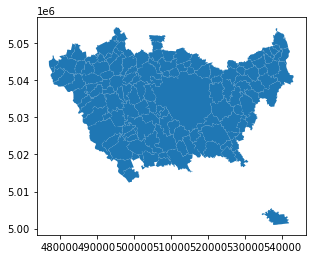

In [17]:
milano = comuni[comuni.NOME_PRO=='MILANO']
milano.plot()

Calcolo la densità. Prima bisogna mergiare

In [18]:
tab_pop = pd.read_csv('./REGIONE_LOMBARDIA/Lombardia_Pop2011_2014.csv',sep=',',encoding= 'unicode_escape')
print(tab_pop.head())

    Codice                Comune  Cod_prov Provincia  Pop2011  Pop2014
0  3017064               CORZANO        17   BRESCIA   1358.0   1427.0
1  3017167               RUDIANO        17   BRESCIA   5861.0   5822.0
2  3017201  VILLANUOVA SUL CLISI        17   BRESCIA   5855.0   5778.0
3  3017084                  IRMA        17   BRESCIA    152.0    128.0
4  3017102     MANERBA DEL GARDA        17   BRESCIA   4985.0   5290.0


Selezioniamo solo quelli milanese

In [19]:
tab_pop = tab_pop.loc[tab_pop['Provincia'] == 'MILANO']

In [20]:
tab_pop.rename(columns={'Codice':'COD_ISTAT'}, inplace=True)

In [21]:
tab_pop.COD_ISTAT=tab_pop.COD_ISTAT.astype(int)
milano.COD_ISTAT=milano.COD_ISTAT.astype(int)
milano = milano.merge(tab_pop, on='COD_ISTAT')
print(milano.head())

                               CLASSREF BELFIORE  COD_ISTAT  \
0  109334ca-566a-46f4-8830-fa1f79665a45     L773    3015236   
1  f5796b94-6f6b-4c9c-bdad-5114fae7b3d4     L665    3015229   
2  3d004856-e8c5-465c-9cee-8739468a986a     H371    3015183   
3  705b9cc3-0b01-42fb-99e8-549296d47441     C986    3015085   
4  41a6164b-c6db-478a-b9d5-cb16211eae68     F155    3015144   

                 NOME_COM COD_PRO NOME_PRO COD_CMO NOME_CMO  COD_ASL  \
0                 VERNATE      15   MILANO    None     None       10   
1                 VANZAGO      15   MILANO    None     None        9   
2  ROBECCHETTO CON INDUNO      15   MILANO    None     None        9   
3                CORBETTA      15   MILANO    None     None        9   
4                  MESERO      15   MILANO    None     None        9   

   NOME_ASL COD_REG   NOME_REG    SHAPE_AREA     SHAPE_LEN  \
0  MILANO 2      03  LOMBARDIA  1.467688e+07  24400.493214   
1  MILANO 1      03  LOMBARDIA  6.129621e+06  14685.078304   
2 

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
milano['density2011'] = round(milano['Pop2011']/(milano['geometry'].area/(10**6)),2)
milano['density2014'] = round(milano['Pop2014']/(milano['geometry'].area/(10**6)),2)

SHAPE AREA E' in $m^2$ quindi bisogna moltiplicare per 10^4

<AxesSubplot:>

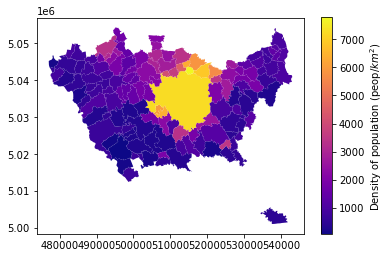

In [23]:
milano.plot(column = milano['density2011'], cmap = 'plasma', legend=True,
            legend_kwds={'label': r'Density of population (peop/$km^2$)'})